In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Dataset/Test.csv')

In [3]:
train_df.shape

(3000, 23)

In [4]:
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [5]:
train_df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [6]:
cat_columns = train_df.select_dtypes(include='object').columns

In [7]:
cat_columns

Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')

In [8]:
train_df.select_dtypes(exclude='object').describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
count,2839.000000,3000.000000,2948.000000,3000.000000,3000.000000,3000.000000,3000.000000,2997.000000,2995.000000,3000.000000,2783.000000,3000.000000,2702.000000,3000.000000,3000.000000,3000.000000
mean,39.797816,3.226333,13.403664,2.405333,46.878000,0.827333,2.794667,6.060727,2.380968,3.067000,0.027530,0.012328,1.907476,2.836333,7.130333,3.232333
std,13.501754,1.065904,10.189245,1.150426,16.051947,0.642643,1.188125,2.096866,1.142826,0.821017,0.999799,0.999734,0.544526,0.940837,1.152876,0.903305
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000
50%,38.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000
75%,52.000000,4.000000,21.000000,3.000000,60.000000,1.000000,4.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000


In [9]:
print("Unique Values for categorical Columns")
for col in cat_columns:
    print(col, '   ----->', train_df[col].unique())

Unique Values for categorical Columns
Employee_ID    -----> ['EID_22713' 'EID_9658' 'EID_22203' ... 'EID_7126' 'EID_4929' 'EID_24750']
Gender    -----> ['F' 'M']
Relationship_Status    -----> ['Single' 'Married']
Hometown    -----> ['Springfield' 'Lebanon' 'Washington' 'Franklin' 'Clinton']
Unit    -----> ['R&D' 'IT' 'Sales' 'Marketing' 'Purchasing' 'Operarions'
 'Human Resource Management' 'Logistics' 'Accounting and Finance'
 'Security' 'Quality' 'Production']
Decision_skill_possess    -----> ['Conceptual' 'Directive' 'Analytical' 'Behavioral']
Compensation_and_Benefits    -----> ['type2' 'type3' 'type0' 'type4' 'type1']


## Imputing null values with mean

In [10]:
null_col_dict = dict(train_df.isna().any())

In [11]:
for col in null_col_dict:
    if(null_col_dict[col]==True):
        col_mean = train_df[col].mean()
        train_df[col] = train_df.fillna(col_mean)

In [12]:
train_df.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [13]:
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,EID_22713,5,Single,Springfield,R&D,Conceptual,EID_22713,4,...,EID_22713,type2,EID_22713,3,EID_22713,-0.4537,EID_22713,1,8,4
1,EID_9658,M,EID_9658,2,Single,Lebanon,IT,Directive,EID_9658,2,...,EID_9658,type2,EID_9658,4,EID_9658,0.7075,EID_9658,2,8,2
2,EID_22203,M,EID_22203,3,Married,Springfield,Sales,Directive,EID_22203,3,...,EID_22203,type3,EID_22203,4,EID_22203,0.7075,EID_22203,1,9,3
3,EID_7652,M,EID_7652,5,Single,Washington,Marketing,Analytical,EID_7652,4,...,EID_7652,type0,EID_7652,3,EID_7652,0.7075,EID_7652,2,8,3
4,EID_6516,F,EID_6516,3,Married,Franklin,R&D,Conceptual,EID_6516,4,...,EID_6516,type2,EID_6516,4,EID_6516,0.7075,EID_6516,2,7,4


In [14]:
train_df.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')

In [15]:
cat_columns


Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')

In [16]:
def treat_var2_var4_col(x):
    x=int(x[4:])
    return x
    

In [17]:
train_df['VAR2']= train_df['VAR2'].apply(lambda x: treat_var2_var4_col(x))
train_df['VAR4']= train_df['VAR4'].apply(lambda x: treat_var2_var4_col(x))
train_df['Work_Life_balance']= train_df['Work_Life_balance'].apply(lambda x: treat_var2_var4_col(x))


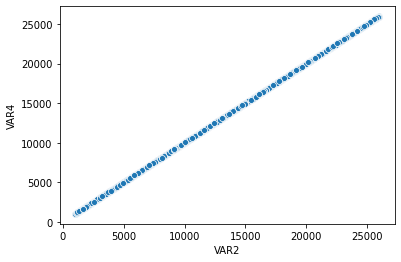

In [18]:
sns.scatterplot(train_df['VAR2'], train_df['VAR4'])

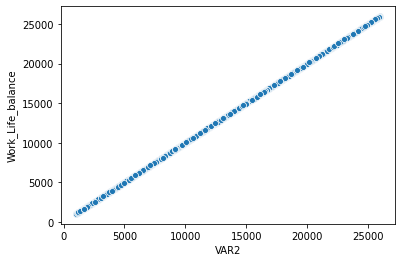

In [19]:
sns.scatterplot(train_df['VAR2'], train_df['Work_Life_balance'])

### Since both var2, var4, Work_life_Balance are same will drop two column

In [20]:
train_df.drop('VAR4',axis=1, inplace=True)
train_df.drop('Work_Life_balance',axis=1, inplace=True)
train_df.drop('Pay_Scale',axis=1, inplace=True)

In [21]:
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7
0,EID_22713,F,EID_22713,5,Single,Springfield,R&D,Conceptual,EID_22713,4,30,1,5,type2,3,22713,-0.4537,1,8,4
1,EID_9658,M,EID_9658,2,Single,Lebanon,IT,Directive,EID_9658,2,72,1,1,type2,4,9658,0.7075,2,8,2
2,EID_22203,M,EID_22203,3,Married,Springfield,Sales,Directive,EID_22203,3,25,0,1,type3,4,22203,0.7075,1,9,3
3,EID_7652,M,EID_7652,5,Single,Washington,Marketing,Analytical,EID_7652,4,28,1,1,type0,3,7652,0.7075,2,8,3
4,EID_6516,F,EID_6516,3,Married,Franklin,R&D,Conceptual,EID_6516,4,47,1,3,type2,4,6516,0.7075,2,7,4


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        3000 non-null   object 
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            3000 non-null   object 
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Compensation_and_Benefits  3000 non-null   objec

In [23]:
cat_columns = list(train_df.select_dtypes(include='object'))

In [24]:
cat_columns

['Employee_ID',
 'Gender',
 'Age',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Compensation_and_Benefits']

In [25]:
train_df[cat_columns]

,Employee_ID,Gender,Age,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Compensation_and_Benefits
0,EID_22713,F,EID_22713,Single,Springfield,R&D,Conceptual,EID_22713,type2
1,EID_9658,M,EID_9658,Single,Lebanon,IT,Directive,EID_9658,type2
2,EID_22203,M,EID_22203,Married,Springfield,Sales,Directive,EID_22203,type3
3,EID_7652,M,EID_7652,Single,Washington,Marketing,Analytical,EID_7652,type0
4,EID_6516,F,EID_6516,Married,Franklin,R&D,Conceptual,EID_6516,type2
...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,EID_22547,Single,Franklin,Sales,Directive,EID_22547,type2
2996,EID_10066,F,EID_10066,Single,Franklin,Marketing,Conceptual,EID_10066,type2
2997,EID_7126,F,EID_7126,Single,Lebanon,Logistics,Analytical,EID_7126,type3
2998,EID_4929,F,EID_4929,Married,Springfield,IT,Behavioral,EID_4929,type3


In [26]:
train_df.drop(columns=['Age','Time_of_service'],axis=1,inplace=True)

In [27]:
train_df.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7
0,EID_22713,F,5,Single,Springfield,R&D,Conceptual,4,30,1,5,type2,3,22713,-0.4537,1,8,4
1,EID_9658,M,2,Single,Lebanon,IT,Directive,2,72,1,1,type2,4,9658,0.7075,2,8,2
2,EID_22203,M,3,Married,Springfield,Sales,Directive,3,25,0,1,type3,4,22203,0.7075,1,9,3
3,EID_7652,M,5,Single,Washington,Marketing,Analytical,4,28,1,1,type0,3,7652,0.7075,2,8,3
4,EID_6516,F,3,Married,Franklin,R&D,Conceptual,4,47,1,3,type2,4,6516,0.7075,2,7,4


In [28]:
cat_columns = list(train_df.select_dtypes(include='object'))
cat_columns = cat_columns[1:]
cat_columns

['Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
for col in cat_columns:
    train_df[col] = le.fit_transform(train_df[col])

In [32]:
train_df.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7
0,EID_22713,0,5,1,3,9,2,4,30,1,5,2,3,22713,-0.4537,1,8,4
1,EID_9658,1,2,1,2,2,3,2,72,1,1,2,4,9658,0.7075,2,8,2
2,EID_22203,1,3,0,3,10,3,3,25,0,1,3,4,22203,0.7075,1,9,3
3,EID_7652,1,5,1,4,4,0,4,28,1,1,0,3,7652,0.7075,2,8,3
4,EID_6516,0,3,0,1,9,2,4,47,1,3,2,4,6516,0.7075,2,7,4


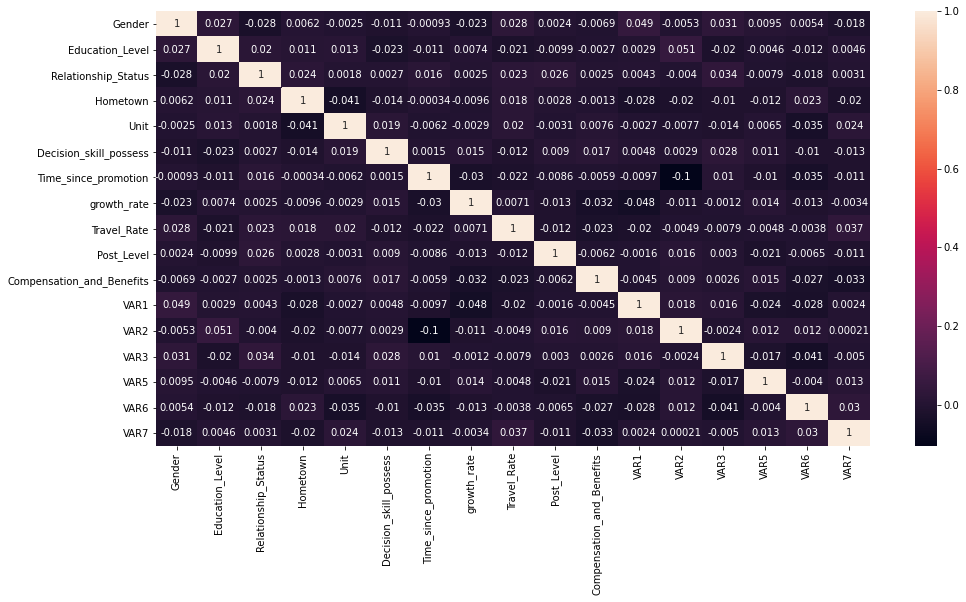

In [33]:
plt.figure(figsize=(16,8))
sns.heatmap(train_df.corr(),annot=True)

In [34]:
train_df.shape

(3000, 18)

In [35]:
train_df.to_csv('Dataset/cleaned_test_file.csv',index=False)